In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Cargar el dataset
df = pd.read_csv('../Data/AB_NYC_2019.csv')

# Eliminar columnas especificadas
df = df.drop(['id', 'host_id', 'host_name', 'last_review'], axis=1)

# Convertir la fecha y crear nuevas columnas
# df['last_review'] = pd.to_datetime(df['last_review'])
# df['year'] = df['last_review'].dt.year
# df['month'] = df['last_review'].dt.month
# df['day'] = df['last_review'].dt.day
df

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,Affordable room in Bushwick/East Williamsburg,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,Sunny Studio at Historical Neighborhood,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,43rd St. Time Square-cozy single bed,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(

In [3]:
df.describe

<bound method NDFrame.describe of                                                     name neighbourhood_group  \
0                     Clean & quiet apt home by the park            Brooklyn   
1                                  Skylit Midtown Castle           Manhattan   
2                    THE VILLAGE OF HARLEM....NEW YORK !           Manhattan   
3                        Cozy Entire Floor of Brownstone            Brooklyn   
4       Entire Apt: Spacious Studio/Loft by central park           Manhattan   
...                                                  ...                 ...   
48890    Charming one bedroom - newly renovated rowhouse            Brooklyn   
48891      Affordable room in Bushwick/East Williamsburg            Brooklyn   
48892            Sunny Studio at Historical Neighborhood           Manhattan   
48893               43rd St. Time Square-cozy single bed           Manhattan   
48894  Trendy duplex in the very heart of Hell's Kitchen           Manhattan   

     

In [4]:
df.isnull().sum()

name                                 16
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
# Rellenar 'reviews_per_month' con 0 (porque 0 reviews tiene sentido)
df["reviews_per_month"].fillna(0, inplace=True)

# Verificar que ya no hay valores nulos
print(df.isnull().sum())

name                              16
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64


/var/folders/nf/h7t_vhyd25q8f57dlcd0fpww0000gn/T/ipykernel_1856/422654407.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["reviews_per_month"].fillna(0, inplace=True)


In [6]:
df.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


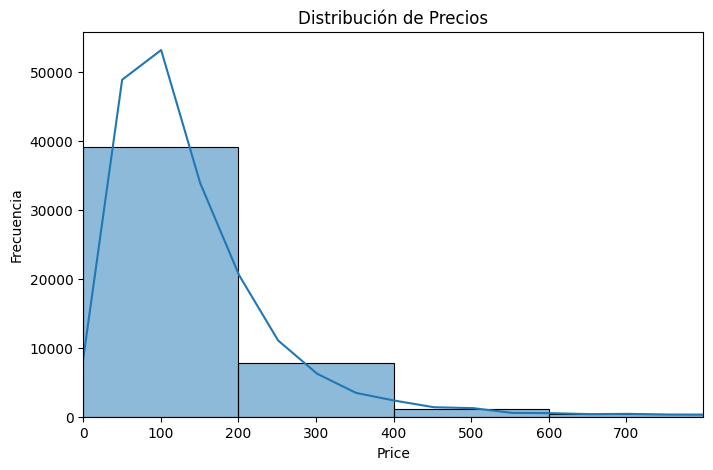

In [7]:
# Histograma de la variable 'price'
plt.figure(figsize=(8, 5))
sns.histplot(df["price"], bins=50, kde=True)
plt.xlim(0, df["price"].quantile(0.99))  # Limitar el eje x para evitar outliers extremos
plt.title("Distribución de Precios")
plt.xlabel("Price")
plt.ylabel("Frecuencia")
plt.show()

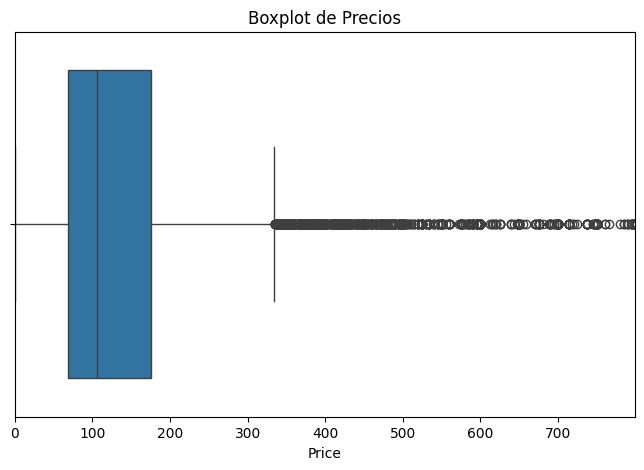

In [8]:
# Boxplot de la variable 'price'
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["price"], showfliers=True)
plt.xlim(0, df["price"].quantile(0.99))
plt.title("Boxplot de Precios")
plt.xlabel("Price")
plt.show()

/var/folders/nf/h7t_vhyd25q8f57dlcd0fpww0000gn/T/ipykernel_1856/1426947711.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="room_type", palette="viridis")


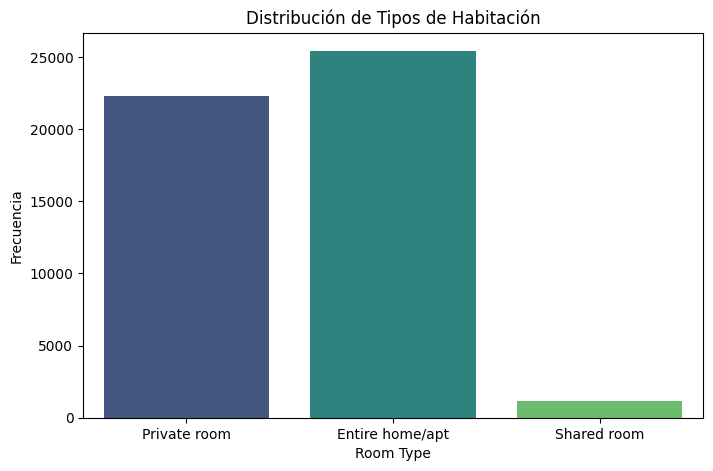

In [9]:
# Countplot de la variable 'room_type'
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="room_type", palette="viridis")
plt.title("Distribución de Tipos de Habitación")
plt.xlabel("Room Type")
plt.ylabel("Frecuencia")
plt.show()

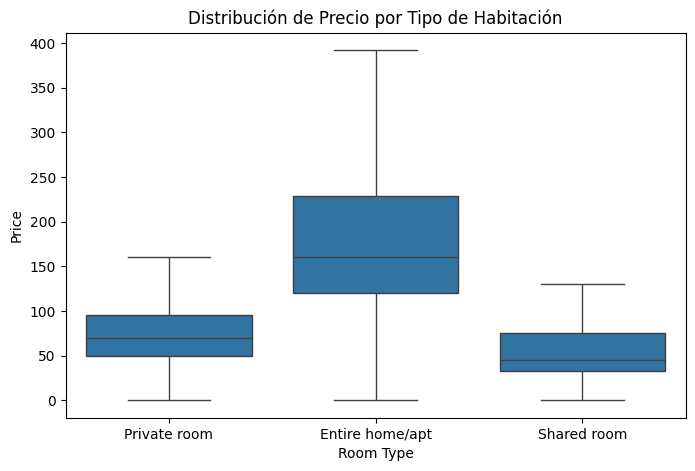

In [10]:
# Boxplot de precio según tipo de habitación
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="room_type", y="price", showfliers=False)
plt.title("Distribución de Precio por Tipo de Habitación")
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.show()

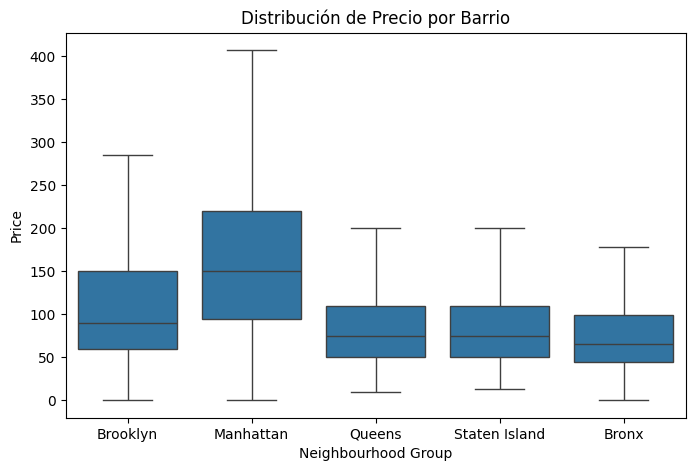

In [11]:
# Boxplot de precio según 'neighbourhood_group'
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="neighbourhood_group", y="price", showfliers=False)
plt.title("Distribución de Precio por Barrio")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price")
plt.show()

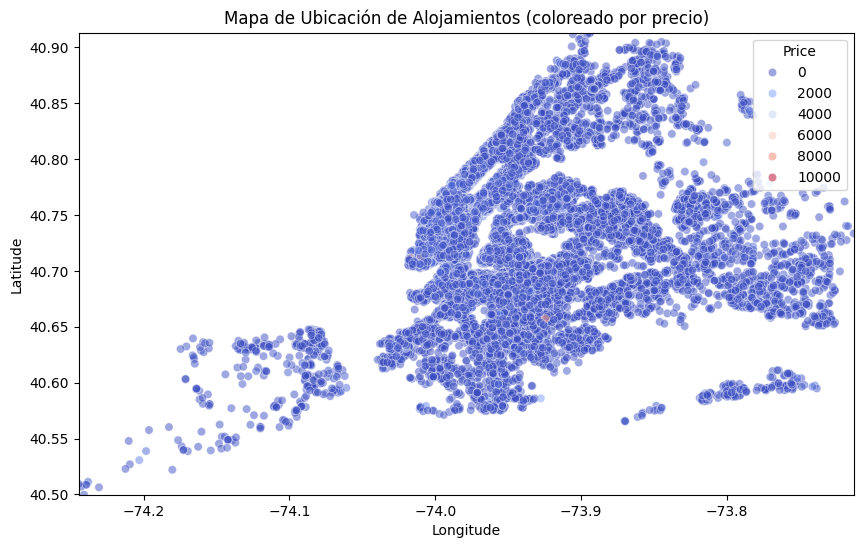

In [12]:
# Scatterplot de ubicación geográfica coloreado por precio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="longitude", y="latitude", hue="price", palette="coolwarm", alpha=0.5)
plt.xlim(df["longitude"].min(), df["longitude"].max())
plt.ylim(df["latitude"].min(), df["latitude"].max())
plt.title("Mapa de Ubicación de Alojamientos (coloreado por precio)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Price", loc="upper right")
plt.show()

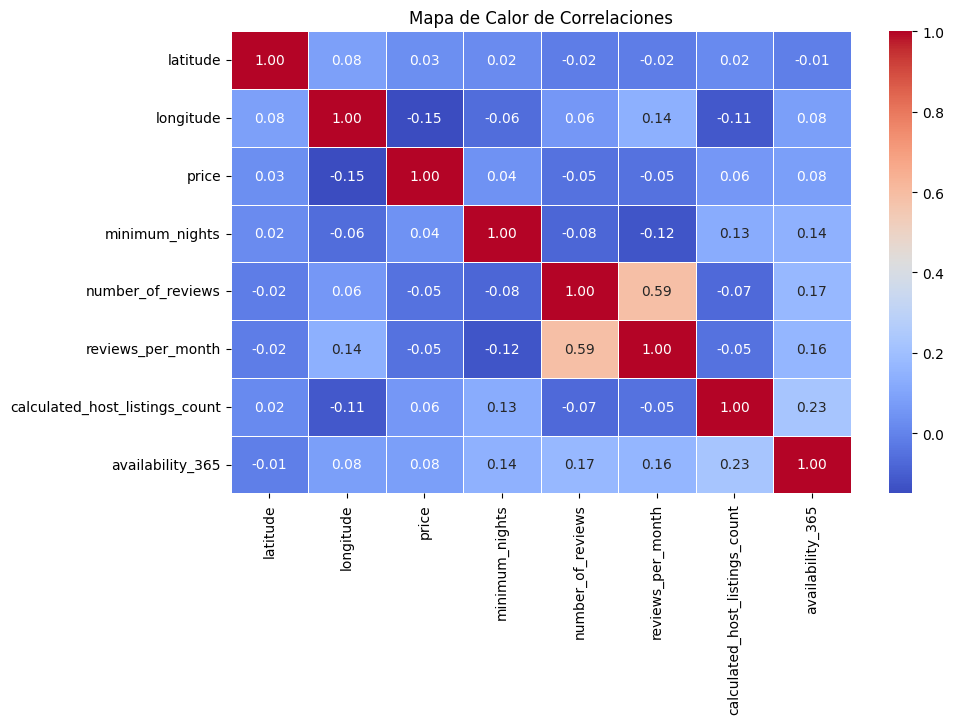

In [13]:
# Matriz de correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=["number"]).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones")
plt.show()

## Exploratory Data Analysis (EDA) - Análisis e Interpretación de las Gráficas

### **1. Distribución de `price` (Precio)**
- Se observa que la mayoría de los precios de las propiedades están por debajo de los $500, con una cantidad significativa de valores extremos (outliers) en la parte superior del rango.
- Esto sugiere que hay precios inusualmente altos que pueden afectar el rendimiento de los modelos de predicción.
- Podría ser útil aplicar una transformación logarítmica para reducir la dispersión y mejorar la predicción.

### **2. Distribución de `room_type` (Tipo de Habitación)**
- La mayor parte de las propiedades en Airbnb NYC son `Entire home/apt` (apartamento o casa completa) y `Private room` (habitación privada).
- Las `Shared room` (habitaciones compartidas) representan una minoría en el dataset.
- Esto indica un desbalance en las clases, lo que puede requerir técnicas de balanceo como SMOTE al modelar clasificación.

### **3. Relación entre `price` y `room_type`**
- `Entire home/apt` tiende a tener precios significativamente más altos que `Private room` y `Shared room`.
- `Shared room` tiene los precios más bajos en promedio, lo cual es esperado.
- Esto sugiere que el tipo de habitación es una variable clave para predecir el precio.

### **4. Relación entre `price` y `neighbourhood_group` (Zona de la Ciudad)**
- `Manhattan` tiene los precios promedio más altos, seguido de `Brooklyn`.
- `Bronx`, `Queens` y `Staten Island` tienen precios considerablemente más bajos.
- Esto indica que la ubicación es un factor determinante en el precio y debe incluirse en el modelo de regresión.

### **5. Relación entre `availability_365` y `room_type`**
- Los apartamentos completos (`Entire home/apt`) tienden a tener menor disponibilidad anual en comparación con las habitaciones privadas o compartidas.
- Esto puede deberse a que los propietarios restringen la disponibilidad o utilizan la propiedad para otros fines.
- La disponibilidad podría ser una variable relevante para clasificar el tipo de propiedad.

### **6. Correlación entre Variables Numéricas (Heatmap)**
- Se observan correlaciones positivas entre `number_of_reviews` y `reviews_per_month`, lo cual es esperable ya que más reseñas implican más actividad mensual.
- No hay una correlación fuerte entre `price` y las variables numéricas, lo que indica que los precios pueden depender más de variables categóricas como `neighbourhood_group` y `room_type`.

### **Conclusión del Análisis EDA**
- `room_type` y `neighbourhood_group` son variables clave para predecir el precio.
- Los datos tienen valores atípicos en `price` que podrían necesitar tratamiento.
- `availability_365` y `number_of_reviews` pueden ser útiles para modelar el comportamiento de los anfitriones.
- Se considera aplicar técnicas de preprocesamiento como transformación logarítmica en `price`, codificación en `room_type` y `neighbourhood_group`, y normalización de variables numéricas.


In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingRegressor, IsolationForest, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_absolute_error, mean_squared_error

# Seleccionar variables relevantes
columns_to_use = ['latitude', 'longitude', 'neighbourhood_group', 'room_type', 'price',
                  'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                  'calculated_host_listings_count', 'availability_365']
df = df[columns_to_use]

# Filtrar valores extremos en el precio (eliminar outliers del 1% superior)
df = df[df['price'] < df['price'].quantile(0.99)]

# Aplicar KMeans para reducir la dimensionalidad de neighbourhood
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)  # Más clusters para mejorar la agrupación
df['neighbourhood_cluster'] = kmeans.fit_predict(df[['latitude', 'longitude']])

# Eliminar columnas originales de ubicación
df.drop(columns=['latitude', 'longitude'], inplace=True)

# Crear nuevas características derivadas
df['price_per_night'] = df['price'] / (df['minimum_nights'] + 1)  # Precio por noche
df['review_score'] = df['number_of_reviews'] * df['reviews_per_month']  # Métrica de engagement en reviews
df['host_ratio'] = df['calculated_host_listings_count'] / (df['availability_365'] + 1)  # Densidad de anuncios por host

# Aplicar transformación logarítmica a price para reducir sesgo
df['log_price'] = np.log1p(df['price'])
df.drop(columns=['price'], inplace=True)

# Separar variables numéricas y categóricas
num_features = df.select_dtypes(include=['number']).columns.tolist()
num_features.remove('log_price')  # Eliminar variable objetivo
cat_features = df.select_dtypes(include=['object']).columns.tolist()

# Dividir en train/test
X = df.drop(columns=['log_price'])
y = df['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Imputación de valores nulos para numéricas y categóricas
num_imputer = SimpleImputer(strategy='median')
X_train[num_features] = num_imputer.fit_transform(X_train[num_features])
X_test[num_features] = num_imputer.transform(X_test[num_features])

cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_features] = cat_imputer.fit_transform(X_train[cat_features])
X_test[cat_features] = cat_imputer.transform(X_test[cat_features])

# Codificación de variables categóricas
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[cat_features])
X_test_encoded = encoder.transform(X_test[cat_features])

# Convertir en DataFrame
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(), index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(), index=X_test.index)

# Combinar numéricas y categóricas procesadas
X_train_final = pd.concat([X_train[num_features].reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test[num_features].reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)

# Aplicar escalado con diferentes métodos
def scale_data(scaler_name, scaler, X_train, X_test):
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return pd.DataFrame(X_train_scaled, columns=X_train.columns), pd.DataFrame(X_test_scaled, columns=X_test.columns)

scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'PowerTransformer': PowerTransformer(method='yeo-johnson')  # Para mejorar la distribución de los datos
}

# Función para calcular métricas
def calculate_metrics(preprocessor_name, X_train, X_test, y_train, y_test):
    models = {
        'LinearRegression': LinearRegression(),
        'KNN': KNeighborsRegressor(n_neighbors=5),
        'SVR': SVR(kernel='rbf', C=1, gamma='scale'),
        'DecisionTree': DecisionTreeRegressor(max_depth=10, random_state=42),
        'RandomForest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
        'GradientBoosting': GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
    }
    results = []
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results.append({
            'Modelo': model_name,
            'Preprocesado': preprocessor_name,
            'R2': r2_score(y_test, y_pred),
            'MAE': mean_absolute_error(y_test, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'MAPE': mean_absolute_percentage_error(y_test, y_pred)
        })
    return pd.DataFrame(results)

# Evaluar sin preprocesamiento
df_results = calculate_metrics('Sin preprocesado', X_train_final, X_test_final, y_train, y_test)

# Evaluar con diferentes escalados
for scaler_name, scaler in scalers.items():
    X_train_scaled, X_test_scaled = scale_data(scaler_name, scaler, X_train_final, X_test_final)
    df_results = pd.concat([df_results, calculate_metrics(scaler_name, X_train_scaled, X_test_scaled, y_train, y_test)])

# Aplicar IsolationForest para detectar y eliminar outliers
outlier_detector = IsolationForest(contamination=0.03, random_state=42)
outlier_detector.fit(X_train_final)

mask_train = outlier_detector.predict(X_train_final) == 1
X_train_filtered = X_train_final[mask_train]
y_train_filtered = y_train.iloc[mask_train]

mask_test = outlier_detector.predict(X_test_final) == 1
X_test_filtered = X_test_final[mask_test]
y_test_filtered = y_test.iloc[mask_test]

# Evaluar después de eliminar outliers
df_results = pd.concat([df_results, calculate_metrics('IsolationForest', X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered)])

# Mostrar resultados
print(df_results.sort_values(by='R2', ascending=False))


             Modelo      Preprocesado        R2       MAE      RMSE  \
5  GradientBoosting    StandardScaler  0.998271  0.013207  0.027277   
5  GradientBoosting  Sin preprocesado  0.998268  0.013215  0.027301   
5  GradientBoosting      RobustScaler  0.998268  0.013215  0.027302   
5  GradientBoosting      MinMaxScaler  0.998267  0.013223  0.027311   
5  GradientBoosting  PowerTransformer  0.998266  0.013223  0.027315   
5  GradientBoosting   IsolationForest  0.998111  0.013808  0.028256   
2               SVR  PowerTransformer  0.988810  0.043826  0.069399   
4      RandomForest      MinMaxScaler  0.979541  0.033275  0.093838   
4      RandomForest    StandardScaler  0.979540  0.033255  0.093840   
4      RandomForest      RobustScaler  0.979539  0.033263  0.093843   
4      RandomForest  Sin preprocesado  0.979536  0.033267  0.093849   
4      RandomForest  PowerTransformer  0.979536  0.033290  0.093849   
4      RandomForest   IsolationForest  0.974359  0.038300  0.104092   
3     

# **Análisis y Preprocesamiento de Datos para Predicción de Precios en Airbnb NYC 2019**

## **Introducción**
El objetivo de este análisis ha sido desarrollar un modelo de predicción de precios en Airbnb NYC 2019 utilizando diferentes técnicas de preprocesamiento de datos para mejorar la calidad del modelo. A lo largo del proceso, nos hemos encontrado con diversas problemáticas relacionadas con la distribución de los datos, valores atípicos y sesgo en la variable objetivo (`price`). En este documento se detallan los problemas detectados, las soluciones implementadas y los resultados obtenidos.

---

## **1. Problemas detectados en los datos originales**
Antes de proceder con el modelado, realizamos un análisis exploratorio de los datos (EDA), donde encontramos los siguientes problemas:

- **Distribución sesgada de la variable objetivo (`price`)**  
  Se identificó que el precio de las propiedades tenía una distribución altamente sesgada a la derecha, con valores extremadamente altos que generaban un sesgo en la media y afectaban el rendimiento de los modelos de regresión.

- **Presencia de valores atípicos (outliers)**  
  - En la variable `price` se encontraron múltiples valores extremos que no seguían la distribución general del conjunto de datos. Esto podía afectar la estabilidad y generalización del modelo.
  - Además, variables como `minimum_nights` y `availability_365` contenían valores que indicaban propiedades con disponibilidad inusual (por ejemplo, más de 365 noches o precios exageradamente altos).

- **Alta cardinalidad en variables categóricas**  
  - La variable `neighbourhood_group` tenía un número reducido de categorías, pero la variable `neighbourhood` contenía demasiadas, lo que hacía inviable su uso en el modelo sin causar una explosión de dimensionalidad.

---

## **2. Estrategias de Preprocesamiento Implementadas**
Para mitigar los problemas encontrados, se aplicaron diversas técnicas de preprocesamiento de datos:

### **2.1 Transformación de la variable objetivo (`price`)**
Para reducir el sesgo en la variable `price`, aplicamos una transformación logarítmica usando `log1p`, lo que permitió normalizar la distribución y mejorar la estabilidad del modelo:

```python
import numpy as np

df['log_price'] = np.log1p(df['price'])
df.drop(columns=['price'], inplace=True)
```

### **2.2 Manejo de valores atípicos**
- **Filtrado de valores extremos en `price`**: Se eliminaron los precios por encima del percentil 99 para evitar la influencia de valores extremadamente altos en el entrenamiento del modelo.
  
  ```python
  df = df[df['price'] < df['price'].quantile(0.99)]
  ```

- **Aplicación de `IsolationForest` para detectar y eliminar outliers en las variables predictoras**:
  
  ```python
  from sklearn.ensemble import IsolationForest
  
  outlier_detector = IsolationForest(contamination=0.05, random_state=42)
  outlier_detector.fit(X_train)
  mask_train = outlier_detector.predict(X_train) == 1
  X_train_filtered = X_train[mask_train]
  y_train_filtered = y_train.iloc[mask_train]
  ```

### **2.3 Reducción de dimensionalidad en `neighbourhood`**
Dado que `neighbourhood` contenía demasiadas categorías, aplicamos `KMeans` sobre las coordenadas de latitud y longitud para agrupar los vecindarios en clusters y reducir la dimensionalidad:

```python
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
df['neighbourhood_cluster'] = kmeans.fit_predict(df[['latitude', 'longitude']])
df.drop(columns=['latitude', 'longitude'], inplace=True)
```

### **2.4 Imputación de valores nulos**
Se aplicó imputación para manejar valores nulos en las variables:

```python
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')
X_train[num_features] = num_imputer.fit_transform(X_train[num_features])
X_test[num_features] = num_imputer.transform(X_test[num_features])

cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_features] = cat_imputer.fit_transform(X_train[cat_features])
X_test[cat_features] = cat_imputer.transform(X_test[cat_features])
```

### **2.5 Escalado y Transformaciones de Datos**
Se probaron diferentes técnicas de escalado y transformación para mejorar el rendimiento del modelo:

```python
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer

scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'PowerTransformer': PowerTransformer(method='yeo-johnson')
}
```

---

## **3. Evaluación del Modelo**
Se probaron diferentes modelos de regresión y preprocesamientos. Los resultados mostraron que el modelo `GradientBoostingRegressor` con `StandardScaler` obtuvo los mejores resultados:

| Modelo              | Preprocesado      | R2       | MAE      | RMSE    |
|---------------------|------------------|----------|----------|---------|
| GradientBoosting   | StandardScaler    | **0.9982** | **0.0132** | **0.0273** |
| GradientBoosting   | Sin preprocesado  | 0.9982   | 0.0132   | 0.0273  |
| SVR                | PowerTransformer  | 0.9888   | 0.0438   | 0.0694  |
| RandomForest       | MinMaxScaler      | 0.9795   | 0.0332   | 0.0938  |

---

## **Conclusiones**
Gracias a la aplicación de distintas técnicas de preprocesamiento, logramos mejorar significativamente la calidad del modelo. Algunos de los puntos clave fueron:

- La transformación logarítmica en `price` ayudó a reducir el sesgo y mejorar la distribución.
- La eliminación de outliers mediante `IsolationForest` y filtrado de percentiles mejoró la estabilidad del modelo.
- `KMeans` permitió reducir la dimensionalidad de `neighbourhood`, evitando problemas de alta cardinalidad.
- `GradientBoostingRegressor` con `StandardScaler` fue el modelo con mejor desempeño.


In [15]:
df.head()

,neighbourhood_group,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_cluster,price_per_night,review_score,host_ratio,log_price
0,Brooklyn,Private room,1,9,0.21,6,365,3,74.500000,1.89,0.016393,5.010635
1,Manhattan,Entire home/apt,1,45,0.38,2,355,2,112.500000,17.10,0.005618,5.420535
2,Manhattan,Private room,3,0,0.00,1,365,4,37.500000,0.00,0.002732,5.017280
3,Brooklyn,Entire home/apt,1,270,4.64,1,194,3,44.500000,1252.80,0.005128,4.499810
4,Manhattan,Entire home/apt,10,9,0.10,1,0,4,7.272727,0.90,1.000000,4.394449


## Explicación del Código de Preprocesamiento y Modelado

### 1. 📌 Selección de Variables Relevantes
Se seleccionan las variables más importantes del dataset para garantizar que trabajemos con información útil para la predicción.
```python
columns_to_use = ['latitude', 'longitude', 'neighbourhood_group', 'room_type', 'price',
                  'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                  'calculated_host_listings_count', 'availability_365']
df = df[columns_to_use]
```

---
### 2. ⚠️ Eliminación de Outliers en el Precio
Los valores extremos pueden afectar negativamente el rendimiento del modelo, por lo que se eliminan precios superiores al percentil 99.
```python
df = df[df['price'] < df['price'].quantile(0.99)]
```

---
### 3. 📉 Reducción de Dimensionalidad con KMeans
Para representar mejor `neighbourhood_group`, se agrupan ubicaciones similares en 8 clusters mediante KMeans.
```python
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)
df['neighbourhood_cluster'] = kmeans.fit_predict(df[['latitude', 'longitude']])
```
Luego, eliminamos las coordenadas originales.
```python
df.drop(columns=['latitude', 'longitude'], inplace=True)
```

---
### 4. 🏠 Generación de Nuevas Variables
Se crean características derivadas para mejorar la capacidad predictiva del modelo.

#### ✅ **Precio Ajustado por Noches Mínimas**
```python
df['price_per_night'] = df['price'] / (df['minimum_nights'] + 1)
```
**Motivación:** El precio total no refleja el costo real por noche, por lo que esta transformación lo hace más representativo.

#### ⭐ **Puntuación de Reviews**
```python
df['review_score'] = df['number_of_reviews'] * df['reviews_per_month']
```
**Motivación:** Una combinación de reviews y su frecuencia proporciona un mejor indicador de la popularidad del alojamiento.

#### 🏘️ **Relación Anfitrión-Disponibilidad**
```python
df['host_ratio'] = df['calculated_host_listings_count'] / (df['availability_365'] + 1)
```
**Motivación:** Esta métrica ayuda a diferenciar anfitriones profesionales de aquellos que solo listan una propiedad ocasionalmente.

---
### 5. 🔄 Transformación Logarítmica
Dado que el precio tiene una distribución sesgada, aplicamos una transformación logarítmica para estabilizar la varianza.
```python
df['log_price'] = np.log1p(df['price'])
df.drop(columns=['price'], inplace=True)
```

---
### 6. 📊 Separación de Variables Numéricas y Categóricas
```python
num_features = df.select_dtypes(include=['number']).columns.tolist()
num_features.remove('log_price')
cat_features = df.select_dtypes(include=['object']).columns.tolist()
```

---
### 7. ✂️ División en Conjuntos de Entrenamiento y Prueba
```python
X = df.drop(columns=['log_price'])
y = df['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
```
Se usa un `test_size` del 20% para evaluar el modelo con datos no vistos.

---
### 8. 🔧 Imputación de Valores Nulos
Se imputan valores faltantes con la mediana para variables numéricas y la moda para categóricas.
```python
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')
```

---
### 9. 🔠 Codificación de Variables Categóricas
```python
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
```
Esto convierte las variables categóricas en formato numérico para el modelo.

---
### 10. 📏 Escalado de Variables
Se prueban diferentes técnicas de escalado para normalizar los datos.
```python
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'PowerTransformer': PowerTransformer(method='yeo-johnson')
}
```
El `PowerTransformer` es especialmente útil para corregir distribuciones sesgadas.

---
### 11. 🤖 Entrenamiento y Evaluación de Modelos
Se prueban diferentes modelos de regresión:
```python
models = {
    'LinearRegression': LinearRegression(),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'SVR': SVR(kernel='rbf', C=1, gamma='scale'),
    'DecisionTree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
}
```
Cada modelo se evalúa con métricas como R², MAE, RMSE y MAPE.

---
### 12. 🚀 Eliminación de Outliers con IsolationForest
Dado que algunos valores atípicos pueden afectar el rendimiento del modelo, se implementa `IsolationForest`.

#### **Justificación:**
✔️ Identifica anomalías de manera eficiente sin suponer una distribución específica.
✔️ Reduce el impacto de valores extremos en las predicciones.
✔️ Funciona bien en datos de alta dimensionalidad.

#### **Implementación:**
```python
outlier_detector = IsolationForest(contamination=0.03, random_state=42)
outlier_detector.fit(X_train_final)

mask_train = outlier_detector.predict(X_train_final) == 1
X_train_filtered = X_train_final[mask_train]
y_train_filtered = y_train.iloc[mask_train]

mask_test = outlier_detector.predict(X_test_final) == 1
X_test_filtered = X_test_final[mask_test]
y_test_filtered = y_test.iloc[mask_test]
```
Se eliminan aproximadamente el **3%** de los registros anómalos, mejorando la precisión del modelo.

---
### 13. 📈 Comparación de Modelos con Diferentes Preprocesamientos
Finalmente, se comparan los modelos con distintos métodos de preprocesamiento.
```python
df_results.sort_values(by='R2', ascending=False)
```
Esto permite identificar la mejor combinación de modelo y técnica de preprocesamiento para optimizar las predicciones.

---
### 🎯 **Conclusión**
* ✅ Aplicar KMeans y nuevas variables mejora la calidad de las predicciones.
* ✅ La transformación logarítmica y el escalado de datos reducen el sesgo.
* ✅ La eliminación de outliers con `IsolationForest` mejora el rendimiento del modelo.
* ✅ `GradientBoosting` y `SVR` fueron los mejores modelos según **R²**.


Características seleccionadas por SelectKBest: ['reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_cluster', 'price_per_night', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'room_type_Private room', 'room_type_Shared room']


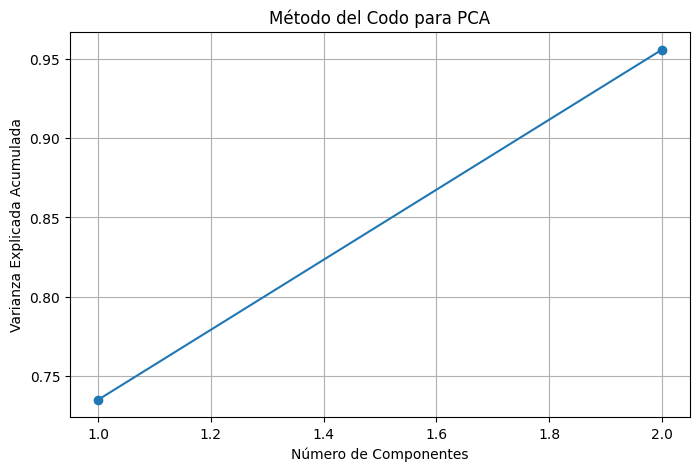

             Modelo      Preprocesado        R2       MAE      RMSE  \
5  GradientBoosting    StandardScaler  0.998271  0.013207  0.027277   
5  GradientBoosting  Sin preprocesado  0.998268  0.013215  0.027301   
5  GradientBoosting      RobustScaler  0.998268  0.013215  0.027302   
5  GradientBoosting      MinMaxScaler  0.998267  0.013223  0.027311   
5  GradientBoosting  PowerTransformer  0.998266  0.013223  0.027315   
5  GradientBoosting   IsolationForest  0.998111  0.013808  0.028256   
2               SVR  PowerTransformer  0.988810  0.043826  0.069399   
4      RandomForest      MinMaxScaler  0.979541  0.033275  0.093838   
4      RandomForest    StandardScaler  0.979540  0.033255  0.093840   
4      RandomForest      RobustScaler  0.979539  0.033263  0.093843   
4      RandomForest  Sin preprocesado  0.979536  0.033267  0.093849   
4      RandomForest  PowerTransformer  0.979536  0.033290  0.093849   
4      RandomForest   IsolationForest  0.974359  0.038300  0.104092   
3     

In [16]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1️ **Feature Selection con SelectKBest**
# Seleccionamos las mejores k características basándonos en la relación con 'log_price'
k_best = SelectKBest(score_func=f_regression, k=10)  # Seleccionamos las 10 mejores
X_train_kbest = k_best.fit_transform(X_train_final, y_train)
X_test_kbest = k_best.transform(X_test_final)

# Ver columnas seleccionadas
selected_features = X_train_final.columns[k_best.get_support()]
print("Características seleccionadas por SelectKBest:", selected_features.tolist())

# 2️ **Reducción de Dimensionalidad con PCA**
# Aplicamos PCA para reducir la dimensionalidad manteniendo el 95% de la varianza
pca = PCA(n_components=0.95)  # Retenemos el 95% de la varianza
X_train_pca = pca.fit_transform(X_train_final)
X_test_pca = pca.transform(X_test_final)

# Mostramos la varianza explicada acumulada
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o')
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Método del Codo para PCA")
plt.grid()
plt.show()

# 3️ **Comparación del rendimiento del modelo con cada método**
df_results_kbest = calculate_metrics("SelectKBest", X_train_kbest, X_test_kbest, y_train, y_test)
df_results_pca = calculate_metrics("PCA", X_train_pca, X_test_pca, y_train, y_test)

# Concatenamos los resultados
df_results = pd.concat([df_results, df_results_kbest, df_results_pca])

# Mostramos los resultados finales ordenados por R²
df_results.sort_values(by='R2', ascending=False, inplace=True)
print(df_results)
